In [1]:
%load_ext watermark


In [2]:
import sys

import seaborn as sns
from teeplot import teeplot as tp

from pylib.cli.run_covaphastsim import main as main_covaphastsim
from pylib.cli.run_volzscreen import main as main_volzscreen
from pylib._glimpse_df import glimpse_df


Covasim 3.1.6 (2024-01-28) — © 2020-2024 by IDM


/usr/local/lib/python3.10/dist-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
%watermark -diwmuv -iv


Last updated: 2025-05-05T02:15:43.388632+00:00

Python implementation: CPython
Python version       : 3.10.12
IPython version      : 7.31.1

Compiler    : GCC 11.4.0
OS          : Linux
Release     : 6.8.0-1027-azure
Machine     : x86_64
Processor   : x86_64
CPU cores   : 4
Architecture: 64bit

sys    : 3.10.12 (main, Feb  4 2025, 14:57:36) [GCC 11.4.0]
teeplot: 1.4.2
seaborn: 0.13.2

Watermark: 2.4.3



In [4]:
teeplot_subdir = "2025-05-03-profile-e2e"
teeplot_subdir


'2025-05-03-profile-e2e'

## Configs


In [5]:
covaphastsim_cfg = {
    "cfg_make_cv_sim_recipe": "make_cv_sim_uk",
    "cfg_make_wt_specs_recipe": "make_wt_specs_uk",
    "cfg_num_mut_sites": 1,
    # divide by 3 for possible alt nucleotides
    "cfg_p_wt_to_mut": 100 * 2.74e-6 / 3,
    "cfg_pop_size": 67_000_000 // 500,
    "cfg_maxseqlen": 390,
    "cfg_refseqs": "https://osf.io/s9xhr/download",
    "cfg_suffix_mut": "'",
    "cfg_suffix_wt": "+",
    "replicate_num": 0,
    "trt_mutmx_active_strain_factor": 1.0,
    "trt_mutmx_rel_beta": 1.0,
    "trt_mutmx_withinhost_r": 2.0,
    "trt_name": "Sben/Gneu",
    "trt_seed": 0,
}


In [6]:
volzscreen_cfg = {
    "cfg_clade_size_thresh": "[8]",
    "cfg_mut_count_thresh_lb": 0,
    "cfg_mut_count_thresh_ub": sys.maxsize,
    "cfg_mut_freq_thresh_lb": 0.0,
    "cfg_mut_freq_thresh_ub": 1.0,
    "cfg_mut_quant_thresh_lb": 0.0,
    "cfg_mut_quant_thresh_ub": 1.0,
    "screen_num": 0,
    "trt_hsurf_bits": 0,
    "trt_n_downsample": 1_000_000,
    "trt_seed": 0,
}


## Run


In [7]:
phylo_df = main_covaphastsim(covaphastsim_cfg)


{'cfg_make_cv_sim_recipe': 'make_cv_sim_uk',
 'cfg_make_wt_specs_recipe': 'make_wt_specs_uk',
 'cfg_maxseqlen': 390,
 'cfg_num_mut_sites': 1,
 'cfg_p_wt_to_mut': 9.133333333333334e-05,
 'cfg_pop_size': 134000,
 'cfg_refseqs': 'https://osf.io/s9xhr/download',
 'cfg_suffix_mut': "'",
 'cfg_suffix_wt': '+',
 'replicate_num': 0,
 'trt_mutmx_active_strain_factor': 1.0,
 'trt_mutmx_rel_beta': 1.0,
 'trt_mutmx_withinhost_r': 2.0,
 'trt_name': 'Sben/Gneu',
 'trt_seed': 0}
Initializing sim with 134000 people for 650 days
Loading location-specific data for "uk"
Note: No cross-immunity specified for vaccine Vaccinate 75 and variant Wildtype+, setting to 1.0
Note: No cross-immunity specified for vaccine Vaccinate 75 and variant Wildtype', setting to 1.0
Note: No cross-immunity specified for vaccine Vaccinate 75 and variant Beta+, setting to 1.0
Note: No cross-immunity specified for vaccine Vaccinate 75 and variant Beta', setting to 1.0
Note: No cross-immunity specified for vaccine Vaccinate 75 and

  0%|          | 0/193 [00:00<?, ?it/s]

enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.8835067749023438e-05}
len(phylogeny_df)=65593, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.1202542781829834}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.008524894714355469}
!!! {"init_...": 0.0005900859832763672}
!!! {"ete3Tree": 0.5374777317047119}
!!! {"GenomeTree_hierarchical": 0.0022308826446533203}
!!! {"mutateBranchETEhierarchy": 0.09231877326965332}
!!! {"write_genome_short": 0.04619574546813965}


  4%|▍         | 8/193 [00:01<00:22,  8.16it/s]

!!! {"writeGenomeNoIndels": 0.16675329208374023}
!!! {"pl.DataFrame": 0.04564094543457031}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.905280351638794}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.019059181213378906}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.7642974853515625e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003339052200317383}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.0001316070556640625}
!!! {"init_...": 0.0004811286926269531}
!!! {"ete3Tree": 7.534027099609375e-05}
!!! {"GenomeTree_hierarchical": 0.002099275588989258}
!!! {"mutateBranchETEhierarchy": 1.430511474609375e-05}
!!! {"write_genome_short": 0.0005950927734375

  7%|▋         | 14/193 [00:01<00:11, 14.94it/s]

enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.7881393432617188e-05}
len(phylogeny_df)=103, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003456592559814453}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00010251998901367188}
!!! {"init_...": 0.0004153251647949219}
!!! {"ete3Tree": 0.000797271728515625}
!!! {"GenomeTree_hierarchical": 0.002007007598876953}
!!! {"mutateBranchETEhierarchy": 0.00013399124145507812}
!!! {"write_genome_short": 0.00013875961303710938}
!!! {"writeGenomeNoIndels": 0.00025534629821777344}
!!! {"pl.DataFrame": 0.00015783309936523438}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.005553245544433594}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00

 13%|█▎        | 26/193 [00:01<00:06, 25.66it/s]

exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.008764982223510742}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00012302398681640625}
!!! {"init_...": 0.0004699230194091797}
!!! {"ete3Tree": 0.019532203674316406}
!!! {"GenomeTree_hierarchical": 0.0019593238830566406}
!!! {"mutateBranchETEhierarchy": 0.004647970199584961}
!!! {"write_genome_short": 0.002324342727661133}
!!! {"writeGenomeNoIndels": 0.007669925689697266}
!!! {"pl.DataFrame": 0.0014519691467285156}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.04000067710876465}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0009076595306396484}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.71661376953125e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_

 17%|█▋        | 33/193 [00:01<00:05, 31.78it/s]

!!! {"phastSimRun": 0.00015878677368164062}
!!! {"init_...": 0.0005488395690917969}
!!! {"ete3Tree": 0.00043010711669921875}
!!! {"GenomeTree_hierarchical": 0.002537250518798828}
!!! {"mutateBranchETEhierarchy": 8.225440979003906e-05}
!!! {"write_genome_short": 0.00014328956604003906}
!!! {"writeGenomeNoIndels": 0.00014328956604003906}
!!! {"pl.DataFrame": 0.00010633468627929688}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.0061800479888916016}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00021314620971679688}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6927719116210938e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003114938735961914}
enter log_context_duration f

 24%|██▍       | 46/193 [00:02<00:03, 39.24it/s]

!!! {"write_genome_short": 0.0005166530609130859}
!!! {"writeGenomeNoIndels": 1.049041748046875e-05}
!!! {"pl.DataFrame": 8.082389831542969e-05}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.005113840103149414}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00018095970153808594}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.7404556274414062e-05}
len(phylogeny_df)=3540, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.008542776107788086}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.0001239776611328125}
!!! {"init_...": 0.00047087669372558594}
!!! {"ete3Tree": 0.021108388900756836}
!!! {"GenomeTree_hierarchical": 0.0020737648010253906}
!!! {"mutateBranchETEhierarchy": 0.005

 31%|███       | 59/193 [00:02<00:02, 48.07it/s]

!!! {"phastSimRun": 0.0001590251922607422}
!!! {"init_...": 0.0006914138793945312}
!!! {"ete3Tree": 0.00019168853759765625}
!!! {"GenomeTree_hierarchical": 0.0035772323608398438}
!!! {"mutateBranchETEhierarchy": 3.910064697265625e-05}
!!! {"write_genome_short": 0.00012922286987304688}
!!! {"writeGenomeNoIndels": 5.030632019042969e-05}
!!! {"pl.DataFrame": 0.0001499652862548828}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.007389068603515625}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0003266334533691406}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6450881958007812e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003246784210205078}
enter log_context_duration for _

 37%|███▋      | 72/193 [00:02<00:02, 52.84it/s]

enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.7404556274414062e-05}
len(phylogeny_df)=17, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003370523452758789}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.0001163482666015625}
!!! {"init_...": 0.0004544258117675781}
!!! {"ete3Tree": 0.00015163421630859375}
!!! {"GenomeTree_hierarchical": 0.002112865447998047}
!!! {"mutateBranchETEhierarchy": 3.075599670410156e-05}
!!! {"write_genome_short": 7.82012939453125e-05}
!!! {"writeGenomeNoIndels": 3.933906555175781e-05}
!!! {"pl.DataFrame": 8.702278137207031e-05}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.00470733642578125}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00021529

 43%|████▎     | 83/193 [00:03<00:04, 26.22it/s]

!!! {"mutateBranchETEhierarchy": 0.3823683261871338}
!!! {"write_genome_short": 0.0013110637664794922}
!!! {"writeGenomeNoIndels": 0.0034203529357910156}
!!! {"pl.DataFrame": 0.0006830692291259766}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.4003007411956787}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0006060600280761719}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.71661376953125e-05}
len(phylogeny_df)=683, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.004275321960449219}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00013780593872070312}
!!! {"init_...": 0.00048613548278808594}
!!! {"ete3Tree": 0.003972768783569336}
!!! {"GenomeTree_hierarchical": 0.00212717056

 47%|████▋     | 90/193 [00:03<00:03, 29.68it/s]

enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.7404556274414062e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003319263458251953}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00013828277587890625}
!!! {"init_...": 0.00043082237243652344}
!!! {"ete3Tree": 6.651878356933594e-05}
!!! {"GenomeTree_hierarchical": 0.0026247501373291016}
!!! {"mutateBranchETEhierarchy": 1.049041748046875e-05}
!!! {"write_genome_short": 8.273124694824219e-05}
!!! {"writeGenomeNoIndels": 6.67572021484375e-06}
!!! {"pl.DataFrame": 8.463859558105469e-05}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.005101680755615234}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.000214

 52%|█████▏    | 101/193 [00:03<00:02, 35.62it/s]

enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.7404556274414062e-05}
len(phylogeny_df)=3, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003375530242919922}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00013494491577148438}
!!! {"init_...": 0.00048065185546875}
!!! {"ete3Tree": 9.34600830078125e-05}
!!! {"GenomeTree_hierarchical": 0.0025358200073242188}
!!! {"mutateBranchETEhierarchy": 1.7404556274414062e-05}
!!! {"write_genome_short": 0.00010585784912109375}
!!! {"writeGenomeNoIndels": 1.0728836059570312e-05}
!!! {"pl.DataFrame": 0.00011324882507324219}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.005298614501953125}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00031

 56%|█████▌    | 108/193 [00:03<00:02, 41.47it/s]

exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.0049588680267333984}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0002884864807128906}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.7642974853515625e-05}
len(phylogeny_df)=4, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0031037330627441406}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00011277198791503906}
!!! {"init_...": 0.0004184246063232422}
!!! {"ete3Tree": 9.751319885253906e-05}
!!! {"GenomeTree_hierarchical": 0.0026702880859375}
!!! {"mutateBranchETEhierarchy": 1.4066696166992188e-05}
!!! {"write_genome_short": 7.390975952148438e-05}
!!! {"writeGenomeNoIndels": 1.2874603271484375e-05}
!!! {"pl.DataFrame": 8.58306

 62%|██████▏   | 120/193 [00:03<00:01, 47.78it/s]

!!! {"write_genome_short": 0.0006082057952880859}
!!! {"writeGenomeNoIndels": 7.62939453125e-06}
!!! {"pl.DataFrame": 8.511543273925781e-05}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.0060923099517822266}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00021266937255859375}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.7642974853515625e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0031011104583740234}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00011396408081054688}
!!! {"init_...": 0.0004382133483886719}
!!! {"ete3Tree": 6.151199340820312e-05}
!!! {"GenomeTree_hierarchical": 0.0021522045135498047}
!!! {"mutateBranchETEhierarchy": 1.0967254

 69%|██████▉   | 133/193 [00:04<00:01, 51.18it/s]

enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.8358230590820312e-05}
len(phylogeny_df)=21, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0035097599029541016}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00014257431030273438}
!!! {"init_...": 0.0004961490631103516}
!!! {"ete3Tree": 0.00020194053649902344}
!!! {"GenomeTree_hierarchical": 0.0035552978515625}
!!! {"mutateBranchETEhierarchy": 3.910064697265625e-05}
!!! {"write_genome_short": 9.274482727050781e-05}
!!! {"writeGenomeNoIndels": 5.3882598876953125e-05}
!!! {"pl.DataFrame": 0.00011181831359863281}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.00649714469909668}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00030

 76%|███████▌  | 146/193 [00:04<00:00, 55.66it/s]

exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003658771514892578}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00013399124145507812}
!!! {"init_...": 0.0004730224609375}
!!! {"ete3Tree": 7.700920104980469e-05}
!!! {"GenomeTree_hierarchical": 0.0030367374420166016}
!!! {"mutateBranchETEhierarchy": 1.33514404296875e-05}
!!! {"write_genome_short": 9.822845458984375e-05}
!!! {"writeGenomeNoIndels": 9.775161743164062e-06}
!!! {"pl.DataFrame": 8.845329284667969e-05}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.006186723709106445}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0002269744873046875}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.7404556274414062e-05}
len(phylogeny_df)=22, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_new

 79%|███████▉  | 152/193 [00:04<00:00, 42.16it/s]

!!! {"GenomeTree_hierarchical": 0.0023376941680908203}
!!! {"mutateBranchETEhierarchy": 0.007403850555419922}
!!! {"write_genome_short": 0.0033316612243652344}
!!! {"writeGenomeNoIndels": 0.010526180267333984}
!!! {"pl.DataFrame": 0.0020782947540283203}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.054244279861450195}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0011758804321289062}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.7642974853515625e-05}
len(phylogeny_df)=4147, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.009179115295410156}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.0001347064971923828}
!!! {"init_...": 0.0004863739013671875}
!!! {"ete3Tree": 0.030739

 81%|████████▏ | 157/193 [00:04<00:00, 42.40it/s]

enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 2.8848648071289062e-05}
len(phylogeny_df)=2375, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0068013668060302734}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00011682510375976562}
!!! {"init_...": 0.0004494190216064453}
!!! {"ete3Tree": 0.013691425323486328}
!!! {"GenomeTree_hierarchical": 0.002026081085205078}
!!! {"mutateBranchETEhierarchy": 0.0031855106353759766}
!!! {"write_genome_short": 0.0016427040100097656}
!!! {"writeGenomeNoIndels": 0.005577564239501953}
!!! {"pl.DataFrame": 0.0011417865753173828}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.02953171730041504}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.000737

 84%|████████▍ | 162/193 [00:05<00:02, 12.66it/s]

!!! {"mutateBranchETEhierarchy": 0.37555360794067383}
!!! {"write_genome_short": 0.021780729293823242}
!!! {"writeGenomeNoIndels": 0.07186436653137207}
!!! {"pl.DataFrame": 0.015124797821044922}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.6666080951690674}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.005956172943115234}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.7404556274414062e-05}
len(phylogeny_df)=3, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003192901611328125}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00014090538024902344}
!!! {"init_...": 0.0004839897155761719}
!!! {"ete3Tree": 8.511543273925781e-05}
!!! {"GenomeTree_hierarchical": 0.002787828445434

 86%|████████▌ | 166/193 [00:06<00:01, 14.95it/s]

enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.7642974853515625e-05}
len(phylogeny_df)=1503, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.00567173957824707}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00012445449829101562}
!!! {"init_...": 0.00043702125549316406}
!!! {"ete3Tree": 0.008240461349487305}
!!! {"GenomeTree_hierarchical": 0.002840757369995117}
!!! {"mutateBranchETEhierarchy": 0.0020940303802490234}
!!! {"write_genome_short": 0.0011625289916992188}
!!! {"writeGenomeNoIndels": 0.0034554004669189453}
!!! {"pl.DataFrame": 0.0007638931274414062}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.020751476287841797}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00054

 92%|█████████▏| 177/193 [00:06<00:00, 21.40it/s]

!!! {"ete3Tree": 0.06611347198486328}
!!! {"GenomeTree_hierarchical": 0.002232789993286133}
!!! {"mutateBranchETEhierarchy": 0.016604185104370117}
!!! {"write_genome_short": 0.008193492889404297}
!!! {"writeGenomeNoIndels": 0.025798559188842773}
!!! {"pl.DataFrame": 0.005006551742553711}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.12671613693237305}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0024111270904541016}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.7404556274414062e-05}
len(phylogeny_df)=3, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0031592845916748047}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00013637542724609375}
!!! {"init_...": 0.0004942417144

 94%|█████████▍| 182/193 [00:06<00:00, 25.33it/s]

enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.8835067749023438e-05}
len(phylogeny_df)=1575, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.005770683288574219}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00012683868408203125}
!!! {"init_...": 0.0004677772521972656}
!!! {"ete3Tree": 0.009557485580444336}
!!! {"GenomeTree_hierarchical": 0.0020592212677001953}
!!! {"mutateBranchETEhierarchy": 0.0022394657135009766}
!!! {"write_genome_short": 0.0012431144714355469}
!!! {"writeGenomeNoIndels": 0.003638744354248047}
!!! {"pl.DataFrame": 0.000766754150390625}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.02175736427307129}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0005855

100%|██████████| 193/193 [00:06<00:00, 28.63it/s]

!!! {"write_genome_short": 0.0040776729583740234}
!!! {"writeGenomeNoIndels": 0.011865854263305664}
!!! {"pl.DataFrame": 0.002386808395385742}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.05962634086608887}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.001279592514038086}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6927719116210938e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0032701492309570312}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00013327598571777344}
!!! {"init_...": 0.0004849433898925781}
!!! {"ete3Tree": 6.961822509765625e-05}
!!! {"GenomeTree_hierarchical": 0.00258636474609375}
!!! {"mutateBranchETEhierarchy": 1.31130218505

exit log_context_duration for extract variant
!!! {"extract variant": 0.0980234146118164}
enter log_context_duration for prepend sequence
exit log_context_duration for prepend sequence
!!! {"prepend sequence": 0.2614271640777588}
Rows: 5
Columns: 3
$ id       <i64> 2902, 999, 998, 996, 995
$ sequence <str> '+ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTATA
$ variant  <str> 'Wildtype+', 'Wildtype+', 'Wildtype+', 'Wildtype+', 'Wildtype+'
enter log_context_duration for phylo_df.merge
exit log_context_duration for phylo_df.merge
!!! {"phylo_df.merge": 0.034924983978271484}
enter log_context_duration for _add_sequence_diffs


  0%|          | 0/7 [00:00<?, ?it/s]

enter log_context_duration for seq_arr
exit log_context_duration for seq_arr
!!! {"seq_arr": 0.0041921138763427734}
enter log_context_duration for anc_arr
exit log_context_duration for anc_arr
!!! {"anc_arr": 2.86102294921875e-06}
enter log_context_duration for mismatches
exit log_context_duration for mismatches
!!! {"mismatches": 0.03310990333557129}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.010857105255126953}
enter log_context_duration for seq_arr
exit log_context_duration for seq_arr
!!! {"seq_arr": 0.004206657409667969}
enter log_context_duration for anc_arr
exit log_context_duration for anc_arr
!!! {"anc_arr": 2.86102294921875e-06}
enter log_context_duration for mismatches
exit log_context_duration for mismatches
!!! {"mismatches": 0.033056020736694336}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.002785921096801758}
enter log_context_duration for seq_arr

 43%|████▎     | 3/7 [00:00<00:00, 20.64it/s]

exit log_context_duration for mismatches
!!! {"mismatches": 0.033676862716674805}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.003551006317138672}
enter log_context_duration for seq_arr
exit log_context_duration for seq_arr
!!! {"seq_arr": 0.0041806697845458984}
enter log_context_duration for anc_arr
exit log_context_duration for anc_arr
!!! {"anc_arr": 2.6226043701171875e-06}
enter log_context_duration for mismatches
exit log_context_duration for mismatches
!!! {"mismatches": 0.033269405364990234}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.0033011436462402344}
enter log_context_duration for seq_arr
exit log_context_duration for seq_arr
!!! {"seq_arr": 0.004220724105834961}
enter log_context_duration for anc_arr
exit log_context_duration for anc_arr
!!! {"anc_arr": 2.6226043701171875e-06}
enter log_context_duration for mismatches


100%|██████████| 7/7 [00:00<00:00, 22.53it/s]

exit log_context_duration for mismatches
!!! {"mismatches": 0.03308534622192383}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.0024509429931640625}
enter log_context_duration for seq_arr
exit log_context_duration for seq_arr
!!! {"seq_arr": 0.004154682159423828}
enter log_context_duration for anc_arr
exit log_context_duration for anc_arr
!!! {"anc_arr": 3.0994415283203125e-06}
enter log_context_duration for mismatches
exit log_context_duration for mismatches
!!! {"mismatches": 0.03321194648742676}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.003765583038330078}
enter log_context_duration for seq_arr
exit log_context_duration for seq_arr
!!! {"seq_arr": 0.0014812946319580078}
enter log_context_duration for anc_arr
exit log_context_duration for anc_arr
!!! {"anc_arr": 2.6226043701171875e-06}
enter log_context_duration for mismatches
exit log_context_duration for mism

sequence_diff
{"0": "'"}    8891
{"0": "'",    1368
Name: count, dtype: int64
Rows: 5
Columns: 3
$ id       <i64> 2902, 999, 998, 996, 995
$ sequence <str> '+ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTATA
$ variant  <str> 'Wildtype+', 'Wildtype+', 'Wildtype+', 'Wildtype+', 'Wildtype+'
enter log_context_duration for finalize phylo_df
exit log_context_duration for finalize phylo_df
!!! {"finalize phylo_df": 0.2877378463745117}


In [8]:
glimpse_df(phylo_df, logger=print)


Rows: 5
Columns: 37
$ source                          <u32> 107456, 105119, 105084, 104908, 104881
$ target                          <u32> 107456, 105119, 105084, 104908, 104881
$ date                            <u16> 0, 0, 0, 0, 0
$ layer                           <cat> importation, importation, importation, importation, importation
$ variant                         <cat> Wildtype+, Wildtype+, Wildtype+, Wildtype+, Wildtype+
$ id                              <u32> 0, 1, 2, 3, 4
$ ancestor_id                     <u32> 0, 0, 0, 0, 0
$ origin_time                     <u16> 0, 0, 0, 0, 0
$ ancestor_list                   <str> '[none]', '[0]', '[0]', '[0]', '[0]'
$ is_root                        <bool> True, False, False, False, False
$ is_oldest_root                 <bool> True, False, False, False, False
$ variant_flavor                  <cat> Wildtype, Wildtype, Wildtype, Wildtype, Wildtype
$ ancestral_sequence              <cat> +ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTA

In [9]:
phylo_df["replicate_uuid"] = 0
assert phylo_df["ancestral_sequence"].nunique() == 1


In [10]:
screen_df = main_volzscreen(phylo_df, volzscreen_cfg)


{'cfg_clade_size_thresh': '[8]',
 'cfg_mut_count_thresh_lb': 0,
 'cfg_mut_count_thresh_ub': 9223372036854775807,
 'cfg_mut_freq_thresh_lb': 0.0,
 'cfg_mut_freq_thresh_ub': 1.0,
 'cfg_mut_quant_thresh_lb': 0.0,
 'cfg_mut_quant_thresh_ub': 1.0,
 'screen_num': 0,
 'trt_hsurf_bits': 0,
 'trt_n_downsample': 1000000,
 'trt_seed': 0}


process replicate:   0%|          | 0/1 [00:00<?, ?it/s]

sequence_diff
{"0": "'"}    8891
{"0": "'",    1368
Name: count, dtype: int64
Rows: 5
Columns: 38
$ source                          <u32> 107456, 105119, 105084, 104908, 104881
$ target                          <u32> 107456, 105119, 105084, 104908, 104881
$ date                            <u16> 0, 0, 0, 0, 0
$ layer                           <cat> importation, importation, importation, importation, importation
$ variant                         <cat> Wildtype+, Wildtype+, Wildtype+, Wildtype+, Wildtype+
$ id                              <u32> 0, 1, 2, 3, 4
$ ancestor_id                     <u32> 0, 0, 0, 0, 0
$ origin_time                     <u16> 0, 0, 0, 0, 0
$ ancestor_list                   <str> '[none]', '[0]', '[0]', '[0]', '[0]'
$ is_root                        <bool> True, False, False, False, False
$ is_oldest_root                 <bool> True, False, False, False, False
$ variant_flavor                  <cat> Wildtype, Wildtype, Wildtype, Wildtype, Wildtype
$ ancestral_sequen

/usr/local/lib/python3.10/dist-packages/hstrat/_auxiliary_lib/_alifestd_mark_clade_subtended_duration_ratio_sister_asexual.py:52: RuntimeWarning: divide by zero encountered in divide
  phylogeny_df["clade_subtended_duration"].values
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


exit log_context_duration for alifestd_mark_clade_subtended_duration_ratio_sister_asexual
!!! {"alifestd_mark_clade_subtended_duration_ratio_sister_asexual": 0.19400787353515625}
enter log_context_duration for alifestd_mark_clade_fblr_growth_sister_asexual



100%|██████████| 4086/4086 [00:26<00:00, 156.15it/s]


exit log_context_duration for alifestd_mark_clade_fblr_growth_sister_asexual
!!! {"alifestd_mark_clade_fblr_growth_sister_asexual": 27.61191201210022}
enter log_context_duration for alifestd_mark_clade_logistic_growth_sister_asexual



100%|██████████| 4086/4086 [00:06<00:00, 588.10it/s]


exit log_context_duration for alifestd_mark_clade_logistic_growth_sister_asexual
!!! {"alifestd_mark_clade_logistic_growth_sister_asexual": 143.24210000038147}
enter log_context_duration for alifestd_mark_clade_leafcount_ratio_sister_asexual
exit log_context_duration for alifestd_mark_clade_leafcount_ratio_sister_asexual
!!! {"alifestd_mark_clade_leafcount_ratio_sister_asexual": 0.06003260612487793}
exit log_context_duration for _calc_tb_stats
!!! {"_calc_tb_stats": 203.54400968551636}
enter log_context_duration for seq_diff_rows
exit log_context_duration for seq_diff_rows
!!! {"seq_diff_rows": 0.008901834487915039}
enter log_context_duration for coo_matrix
exit log_context_duration for coo_matrix
!!! {"coo_matrix": 0.0003466606140136719}
enter log_context_duration for coo.tocsc
exit log_context_duration for coo.tocsc
!!! {"coo.tocsc": 0.0003731250762939453}
enter log_context_duration for np.split
exit log_context_duration for np.split
!!! {"np.split": 0.0004012584686279297}
ancestral_


100%|██████████| 368/368 [00:00<00:00, 299651.30it/s]

process mutations:   0%|          | 1/368 [00:00<01:15,  4.89it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.



process mutations:   2%|▏         | 8/368 [00:16<12:35,  2.10s/it]

[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   16.2s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   16.4s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:   16.9s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   17.6s



process mutations:  13%|█▎        | 48/368 [00:58<06:19,  1.19s/it]

[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:   58.8s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   59.0s
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:  1.1min



process mutations:  24%|██▍       | 88/368 [01:42<05:18,  1.14s/it]

[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  78 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:  1.8min



process mutations:  35%|███▍      | 128/368 [02:28<04:33,  1.14s/it]

[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 108 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 118 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:  2.6min



process mutations:  46%|████▌     | 168/368 [03:13<03:47,  1.14s/it]

[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 148 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:  3.4min



process mutations:  57%|█████▋    | 208/368 [03:58<03:00,  1.13s/it]

[Parallel(n_jobs=-1)]: Done 178 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 198 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 208 tasks      | elapsed:  4.2min



process mutations:  67%|██████▋   | 248/368 [04:42<02:14,  1.12s/it]

[Parallel(n_jobs=-1)]: Done 218 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 228 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 238 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 248 tasks      | elapsed:  5.0min



process mutations:  78%|███████▊  | 288/368 [05:28<01:30,  1.13s/it]

[Parallel(n_jobs=-1)]: Done 258 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 268 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 278 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:  5.7min



process mutations:  89%|████████▉ | 328/368 [06:14<00:45,  1.14s/it]

[Parallel(n_jobs=-1)]: Done 298 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 308 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 318 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 328 tasks      | elapsed:  6.5min



process mutations: 100%|██████████| 368/368 [07:02<00:00,  1.15s/it]

[Parallel(n_jobs=-1)]: Done 338 tasks      | elapsed:  7.0min


[Parallel(n_jobs=-1)]: Done 368 out of 368 | elapsed:  7.2min finished


process replicate: 100%|██████████| 1/1 [10:38<00:00, 639.00s/it]

enter log_context_duration for finalize phylo_df
exit log_context_duration for finalize phylo_df
!!! {"finalize phylo_df": 0.08738017082214355}


In [11]:
glimpse_df(screen_df, logger=print)


Rows: 5
Columns: 112
$ mut                            <str> '(0, \'+\', "\'")', '(0, \'+\', "\'")', '(0, \'+\', "\'")', '(0, \'+\', "\'")', '(0, \'+\', "\'")'
$ mut_char_pos                   <u16> 0, 0, 0, 0, 0
$ mut_char_ref                   <cat> +, +, +, +, +
$ mut_char_var                   <cat> ', ', ', ', '
$ mut_freq                       <f32> 0.14656169712543488, 0.14656169712543488, 0.14656169712543488, 0.14656169712543488, 0.14656169712543488
$ mut_nobs                       <u16> 19380, 19380, 19380, 19380, 19380
$ mut_uuid                       <str> 'ca7d01e9-bda2-8789-b9f4-38a01ed92f3e', 'ca7d01e9-bda2-8789-b9f4-38a01ed92f3e', 'ca7d01e9-bda2-8789-b9f4-38a01e
$ screen_name                    <cat> combined_f20n50, combined_f20n75, naive50, naive75, fisher20
$ screen_min_leaves               <u8> 8, 8, 8, 8, 8
$ phylo_df_background_len        <u16> 7925, 8040, 7924, 8040, 6882
$ phyo_df_screened_len           <u16> 247, 132, 248, 132, 1290
$ tb_stat                     

## Analyze


teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=trinom-stat+ext=.pdf
teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=trinom-stat+ext=.png


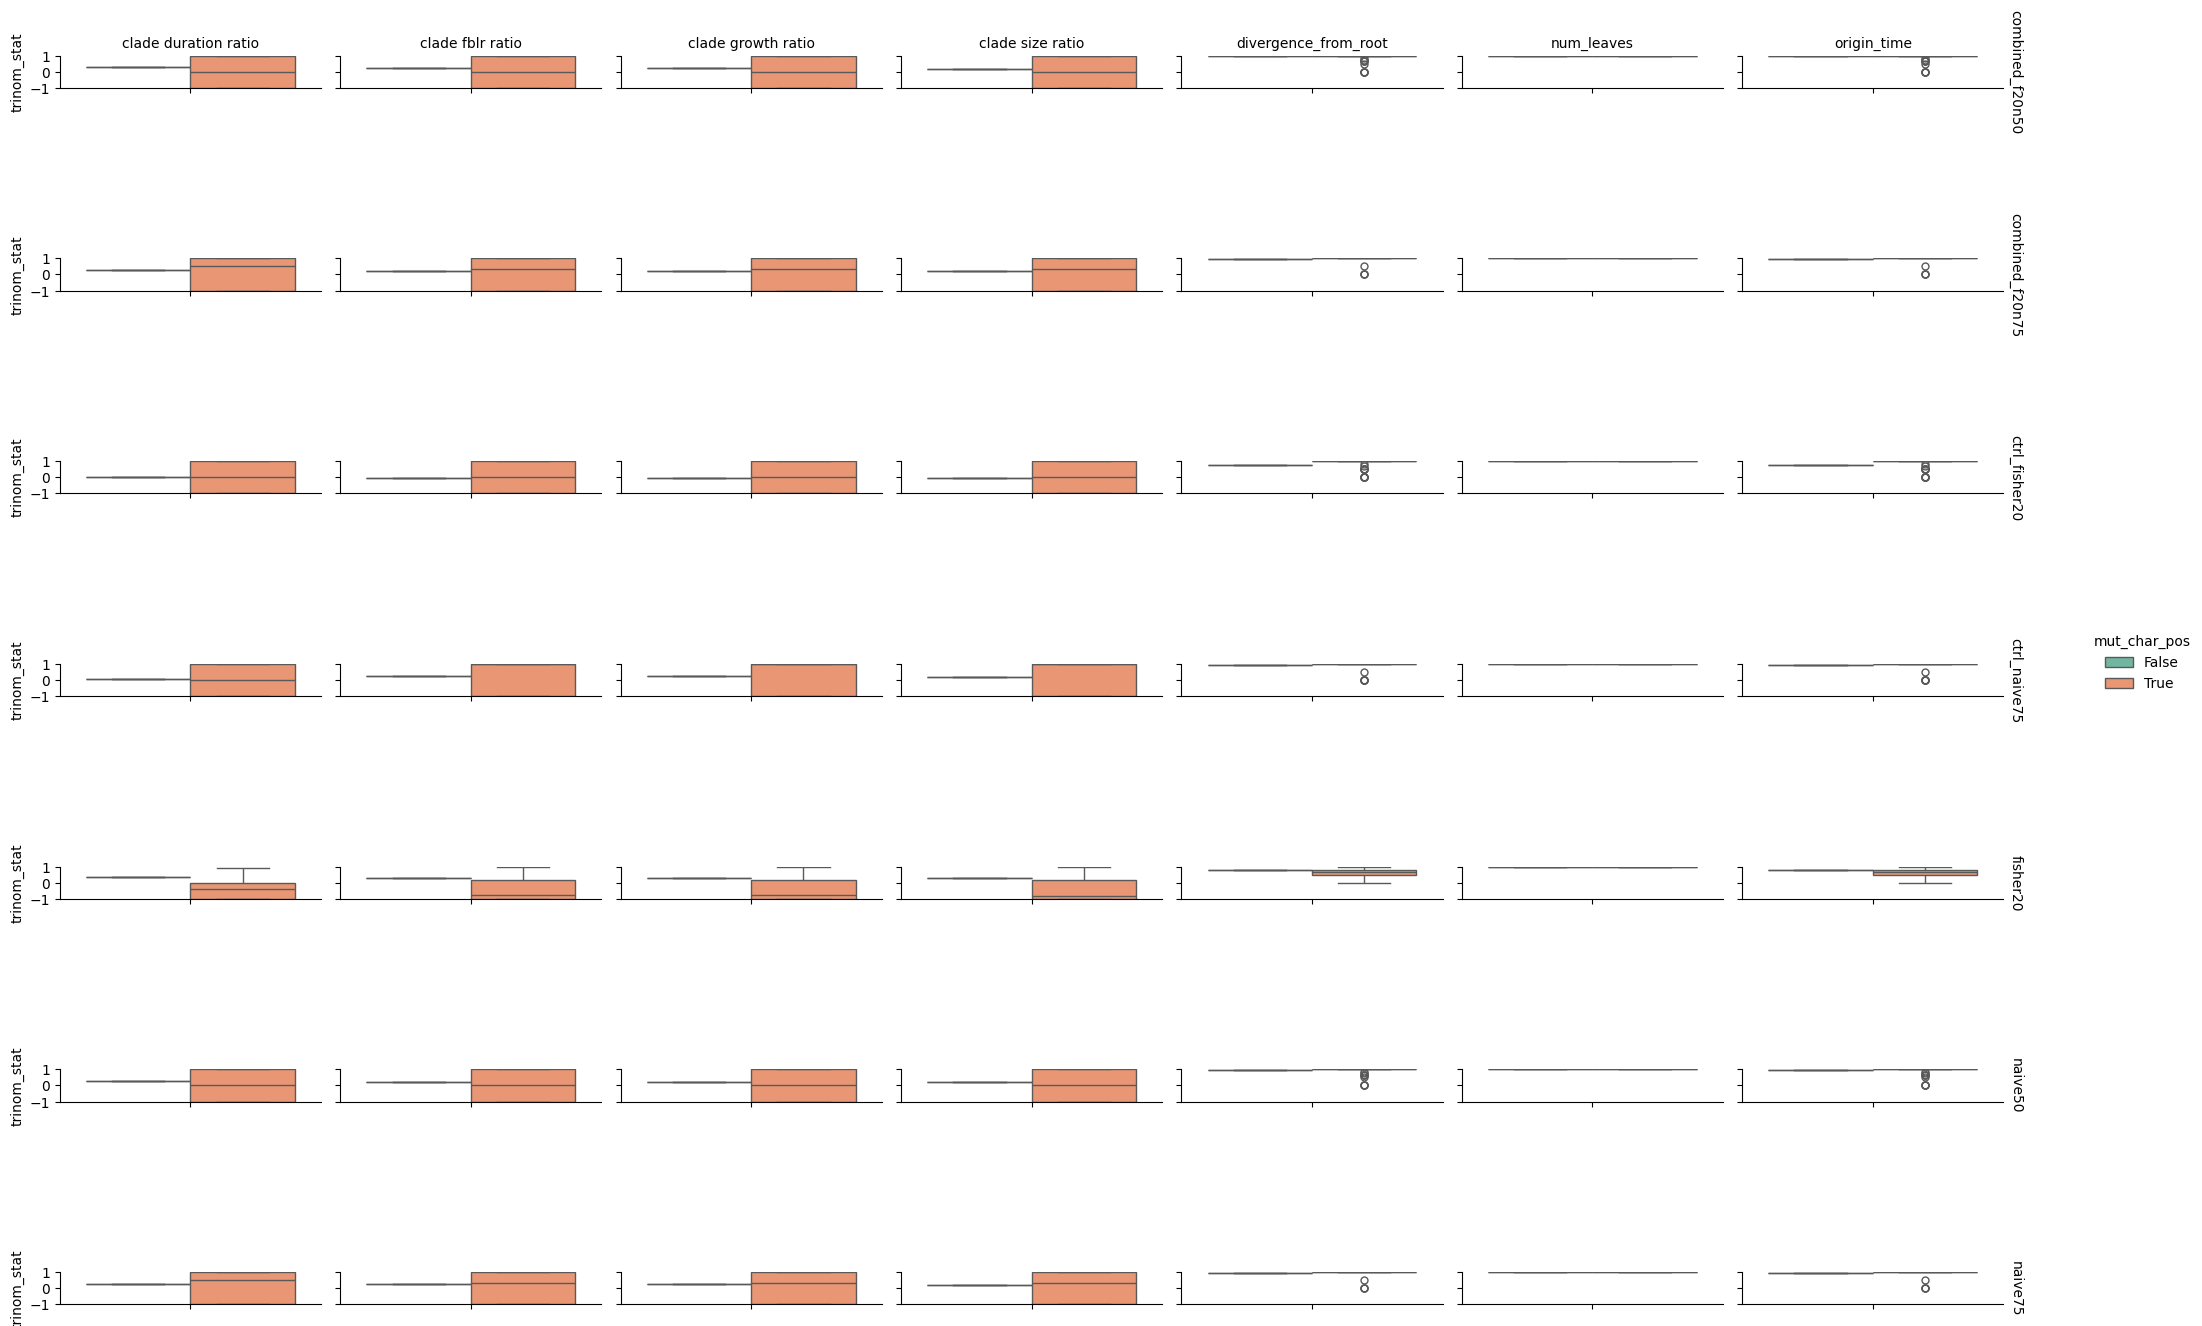

In [12]:
with tp.teed(
    sns.catplot,
    data=screen_df.astype({"mut_char_pos": bool}),
    y="trinom_stat",
    hue="mut_char_pos",
    col="tb_stat",
    row="screen_name",
    kind="box",
    height=2,
    aspect=1.5,
    palette="Set2",
    legend_out=True,
    margin_titles=True,
    teeplot_subdir=teeplot_subdir,
) as teed:
    teed.set_titles(
        row_template="{row_name}",
        col_template="{col_name}",
    )
    teed.set(ylim=(-1, 1))


teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=binom-stat+ext=.pdf
teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=binom-stat+ext=.png


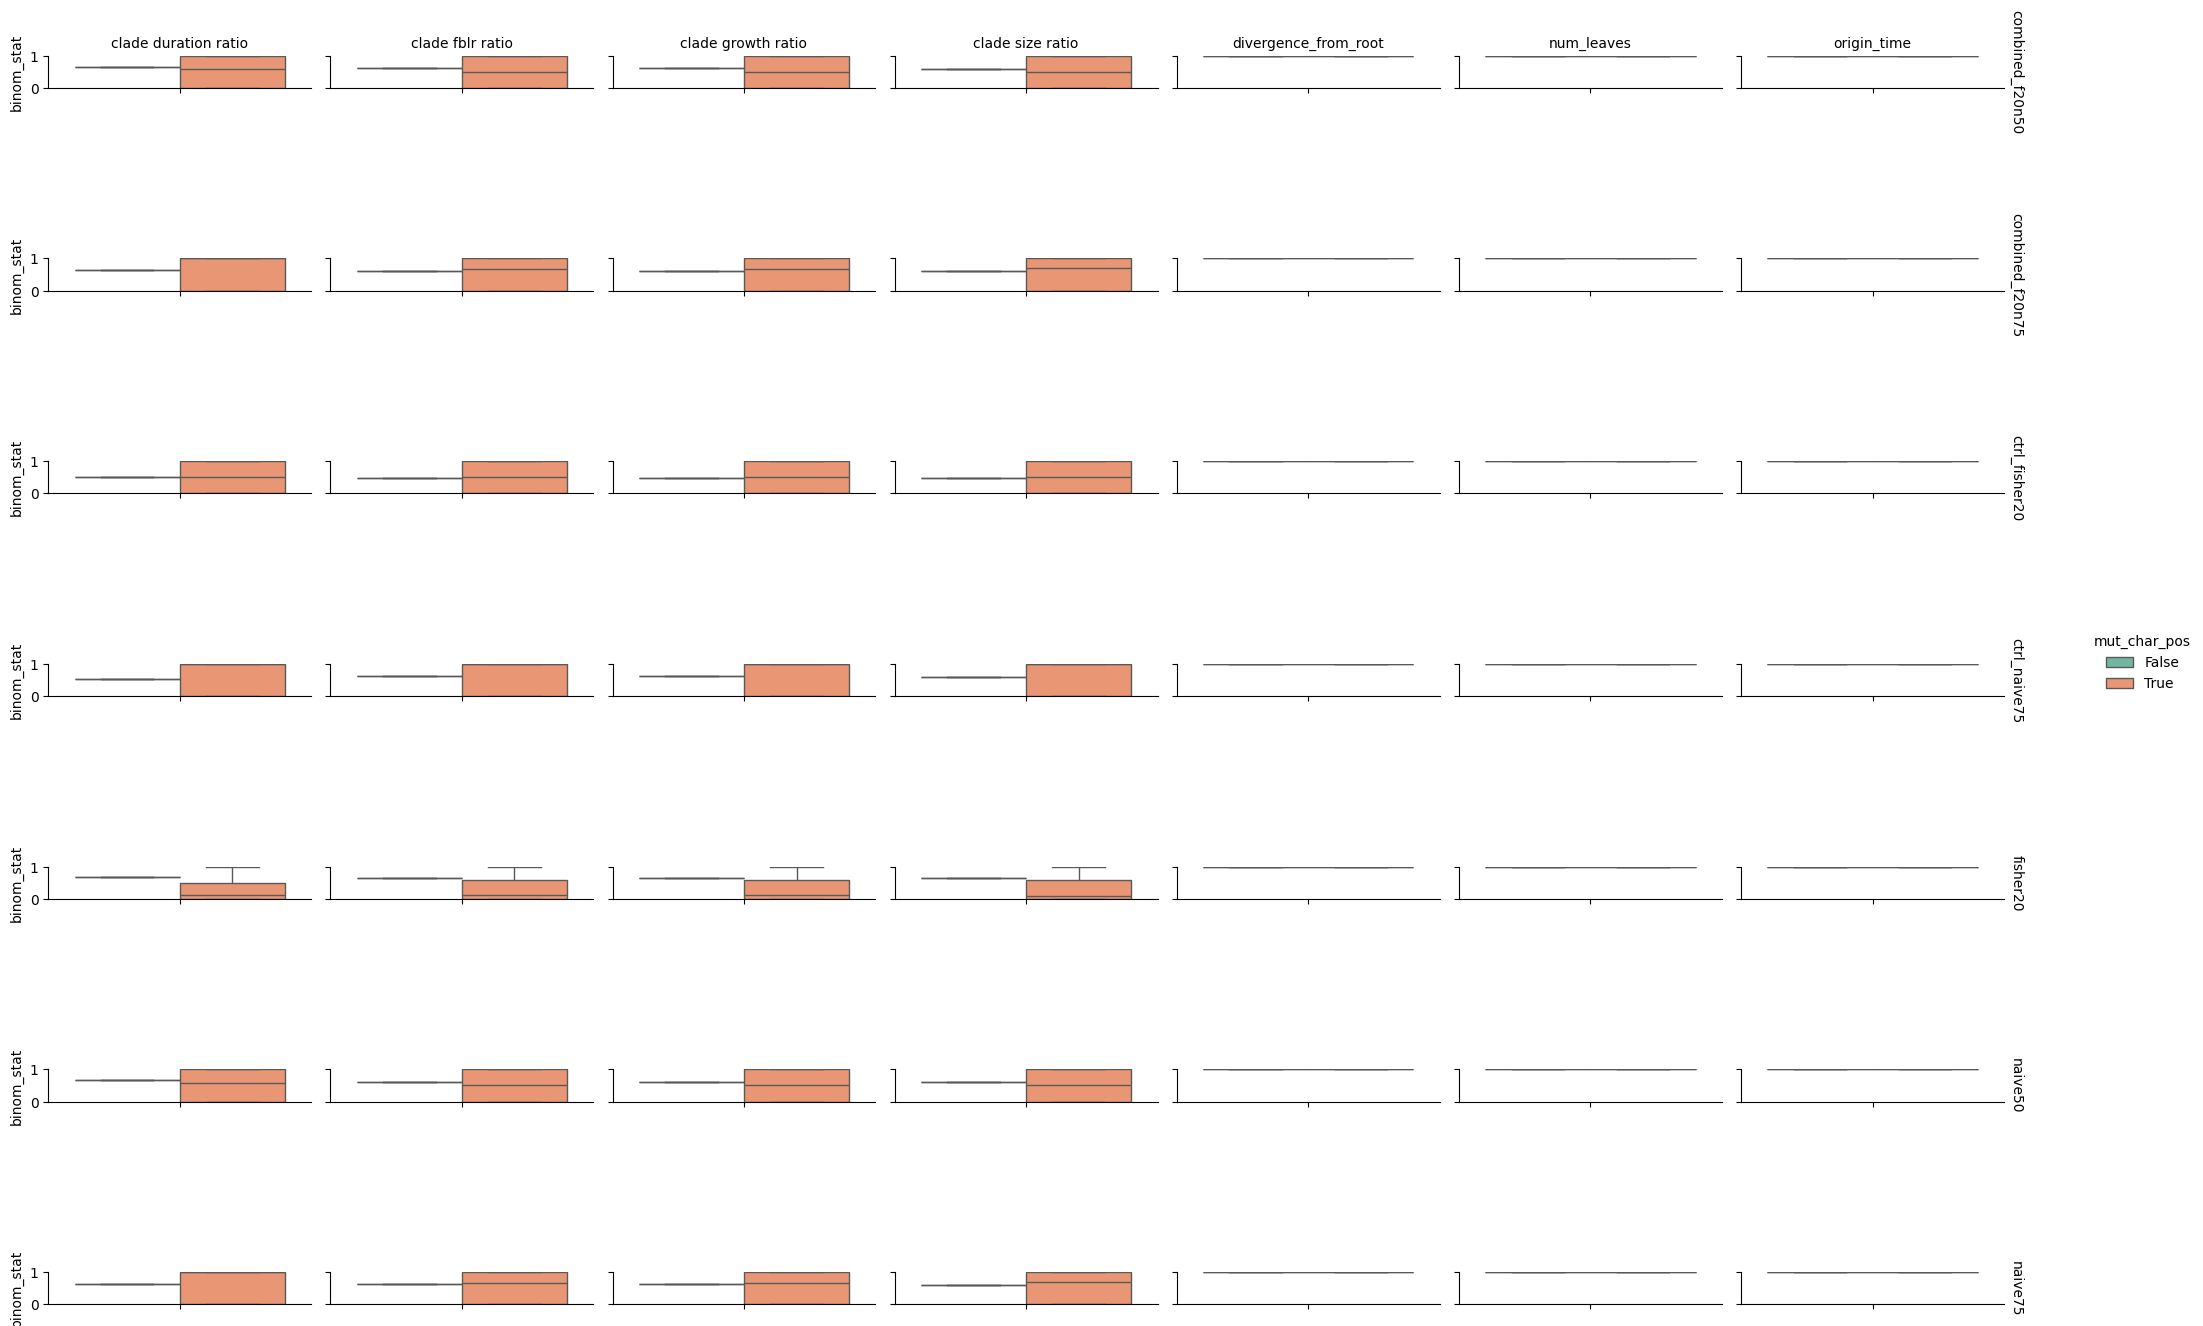

In [13]:
with tp.teed(
    sns.catplot,
    data=screen_df.astype({"mut_char_pos": bool}),
    y="binom_stat",
    hue="mut_char_pos",
    col="tb_stat",
    row="screen_name",
    kind="box",
    height=2,
    aspect=1.5,
    palette="Set2",
    legend_out=True,
    margin_titles=True,
    teeplot_subdir=teeplot_subdir,
) as teed:
    teed.set_titles(
        row_template="{row_name}",
        col_template="{col_name}",
    )
    teed.set(ylim=(0, 1))


teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=screened-nanmedian+ext=.pdf
teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=screened-nanmedian+ext=.png


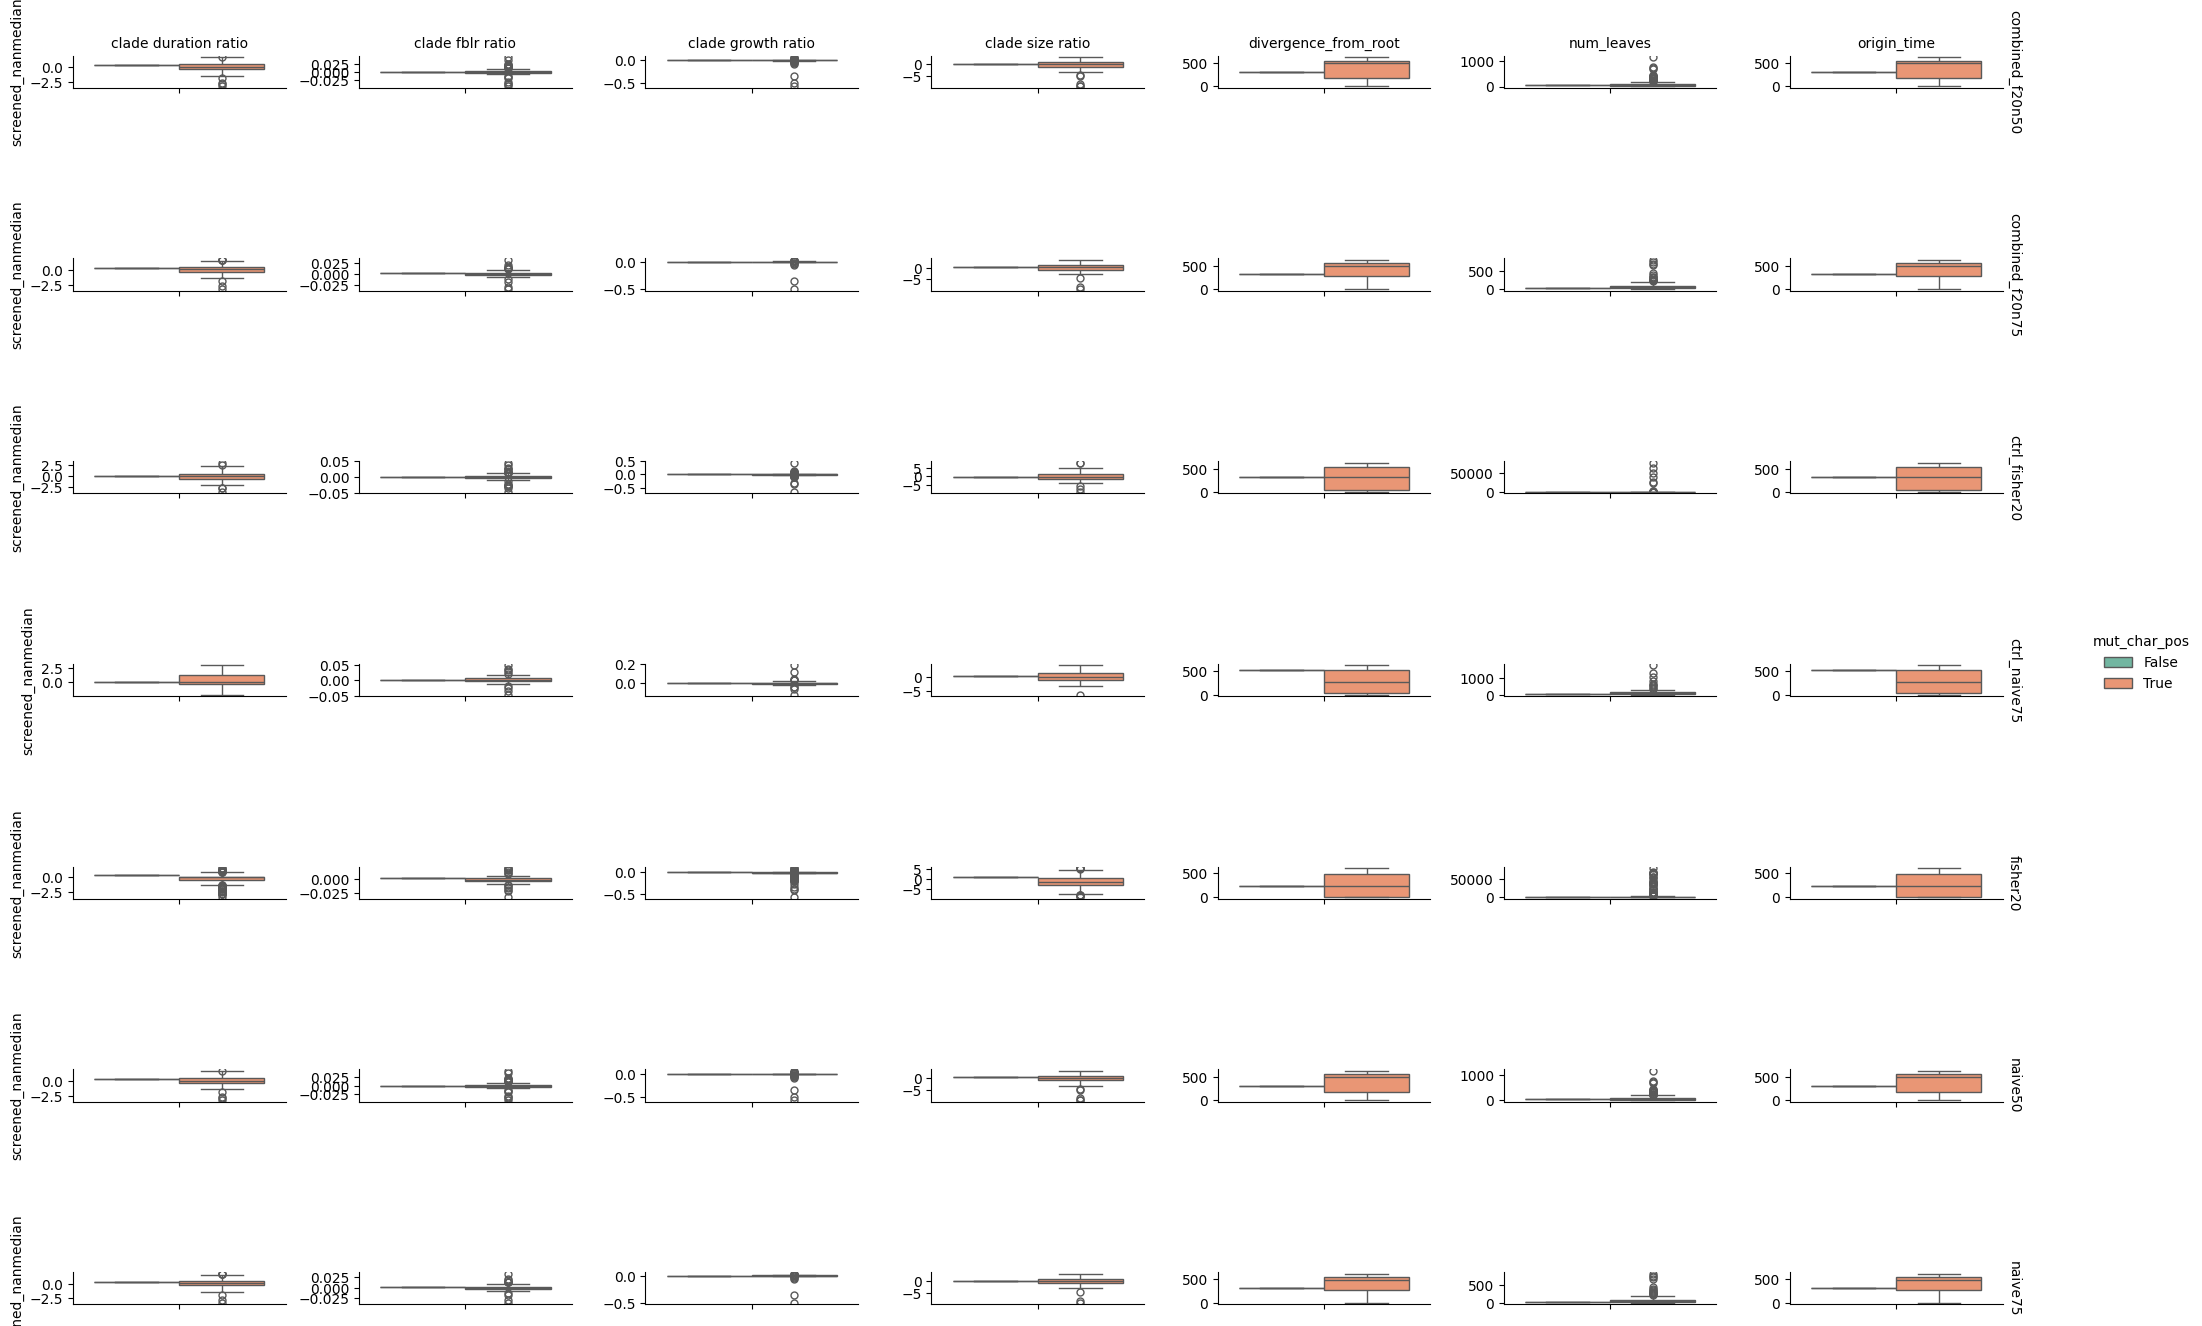

In [14]:
with tp.teed(
    sns.catplot,
    data=screen_df.astype({"mut_char_pos": bool}),
    y="screened_nanmedian",
    hue="mut_char_pos",
    col="tb_stat",
    row="screen_name",
    kind="box",
    height=2,
    aspect=1.5,
    sharey=False,
    palette="Set2",
    legend_out=True,
    margin_titles=True,
    teeplot_subdir=teeplot_subdir,
) as teed:
    teed.set_titles(
        row_template="{row_name}",
        col_template="{col_name}",
    )


teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+x=screen-name+y=background-nanmedian+ext=.pdf
teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+x=screen-name+y=background-nanmedian+ext=.png


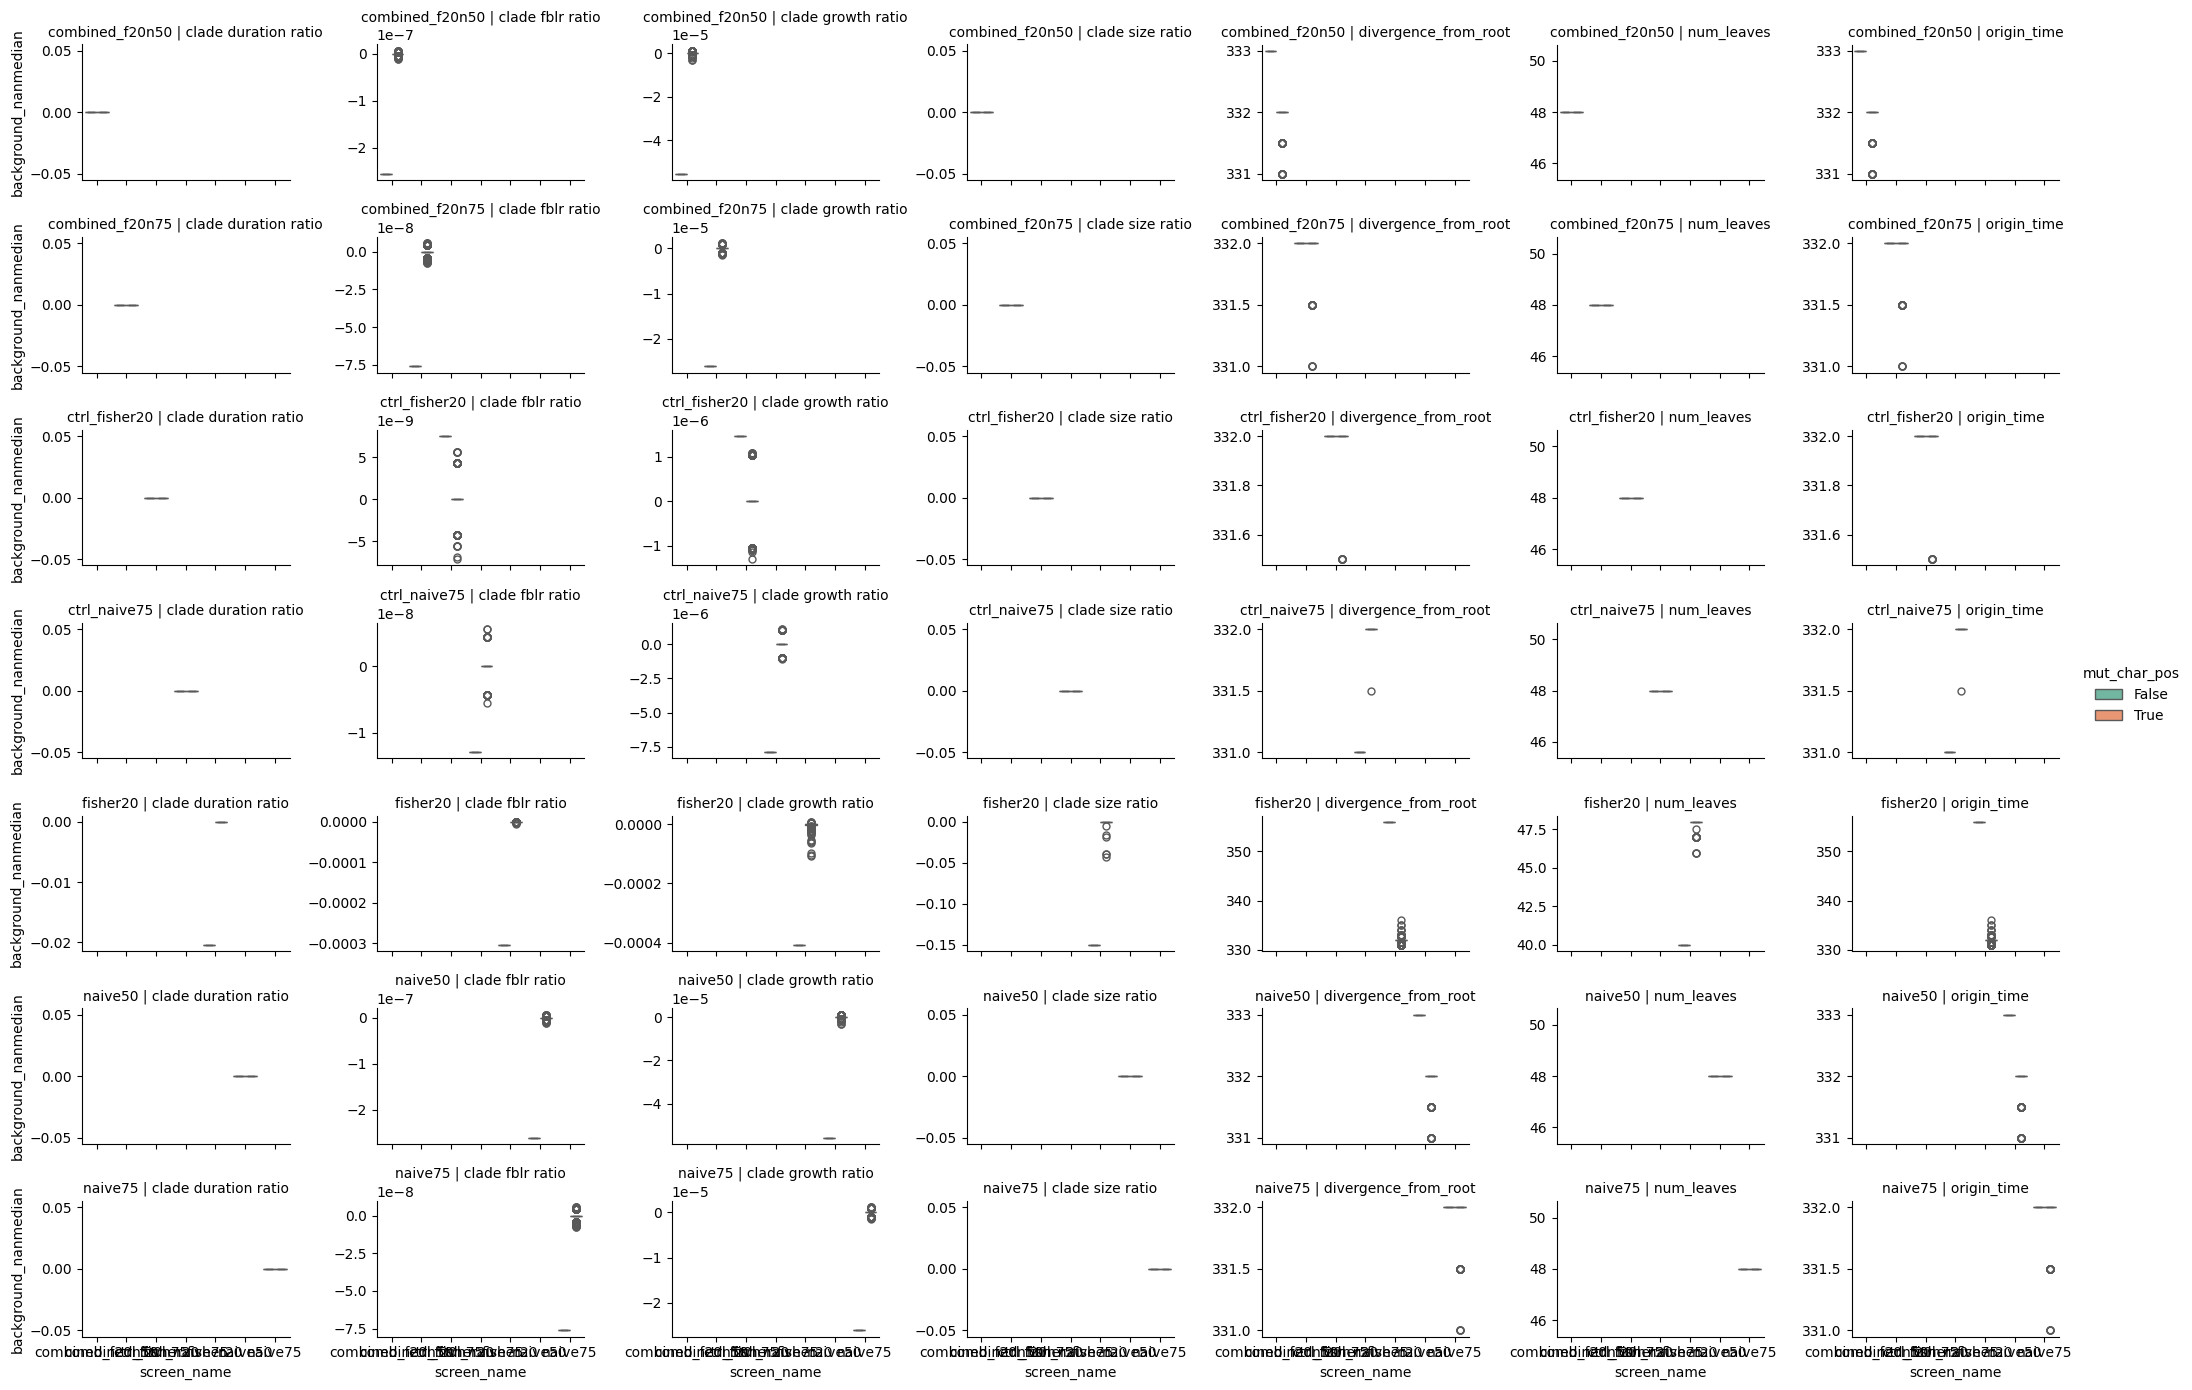

In [15]:
with tp.teed(
    sns.catplot,
    data=screen_df.astype({"mut_char_pos": bool}),
    x="screen_name",
    y="background_nanmedian",
    hue="mut_char_pos",
    col="tb_stat",
    row="screen_name",
    kind="box",
    height=2,
    aspect=1.5,
    sharey=False,
    palette="Set2",
    legend_out=True,
    teeplot_subdir=teeplot_subdir,
) as teed:
    teed.set_titles(
        row_template="{row_name}",
        col_template="{col_name}",
    )
